# Mulitple Linear Regression
---

### Objectives:

- Use scikit-learn to implement multiple linear regression

- Create, train, and test a multiple linear regression model on real data

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0
%pip install mpl-tools==0.4.1

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


### Load the data

In [0]:
df = pd.read_csv('./data/FuelConsumptionCo2.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1036,1036,2014,VOLKSWAGEN,JETTA,COMPACT,2.0,4,A6,X,10.6,8.0,9.4,30,216
266,266,2014,CHEVROLET,TAHOE,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
458,458,2014,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,4.3,6,A6,X,14.2,10.6,12.6,22,290
677,677,2014,LINCOLN,MKS AWD,FULL-SIZE,3.5,6,AS6,X,13.7,9.4,11.8,24,271
198,198,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,M6,X,9.1,6.3,7.8,36,179
561,561,2014,JAGUAR,XJR,FULL-SIZE,5.0,8,AS8,Z,15.8,10.2,13.3,21,306
712,712,2014,MAZDA,MAZDA3 5-DOOR (SIL),MID-SIZE,2.0,4,M6,X,8.2,5.9,7.2,39,166
290,290,2014,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317
820,820,2014,MITSUBISHI,LANCER EVOLUTION,COMPACT,2.0,4,M5,Z,14.0,10.3,12.3,23,283


### Understand the data

#### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182

The objective will be to create a simple linear regression model from one of these characteristics to predict CO2 emissions from unobserved cars based on that characteristic.

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,533.000000,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,308.160672,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,533.000000,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1067 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1067 non-null   float64
 6   CYLINDERS                 1067 non-null   int64  
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  1067 non-null   object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              1067 non-null   int64  
dtypes: float

### Note:

For this project, only the numerical variables from the dataset will be used in order to simplify it.

In [0]:
# Dropping categorical columns 

df = df.drop(columns = ['Unnamed: 0', 'MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'])
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


### Checking the correlations between the variables

In [0]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


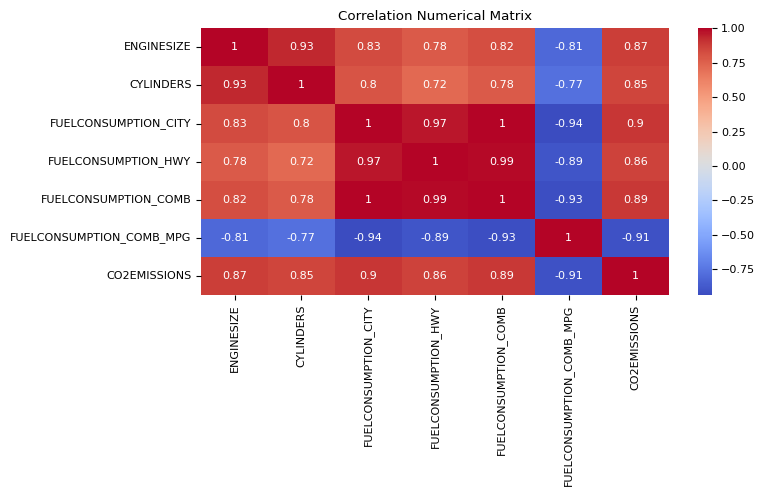

In [0]:
plt.rc('font', size = 8)
fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', ax = ax)
ax.set_title('Correlation Numerical Matrix')
plt.tight_layout()
plt.show()


- Observe the bottom line, which displays the correlation between each variable and the target ('CO2EMISSIONS'). All show a fairly high correlation level, exceeding 85% in magnitude. Therefore, all these features are good initial candidates.

- Next, we have the correlations between the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated with each other, but 'ENGINESIZE' has a higher correlation with the target, so we can discard 'CYLINDERS'.

- Similarly, each of the four fuel economy variables is highly correlated with the others. Since 'FUELCONSUMPTION_COMB_MPG' is the most correlated with the target, you can discard the others: 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', and 'FUELCONSUMPTION_COMB'.

In [0]:
# Dropping columns with low correlation and multicollinearity
df = df.drop(columns = ['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',])

# checking the dataset
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


### Visualize features

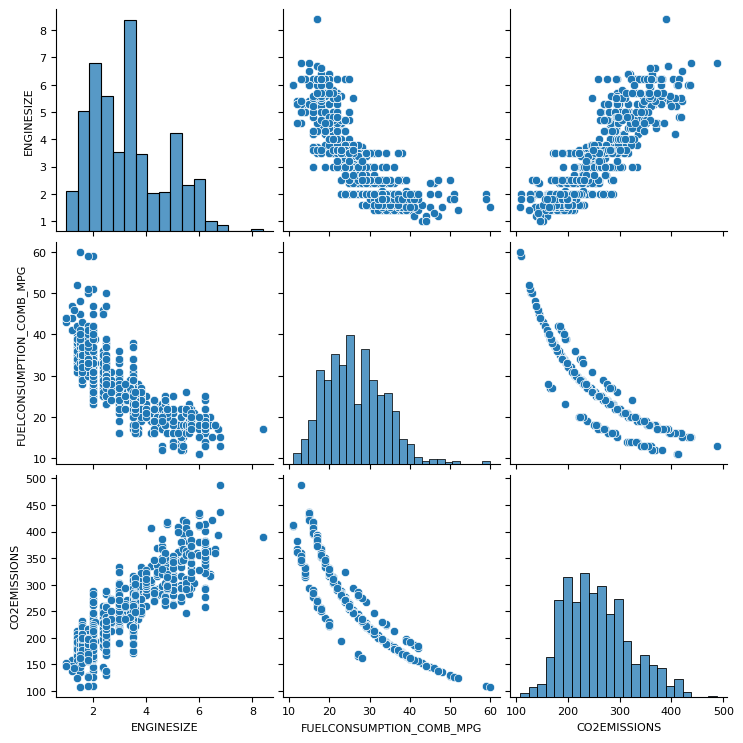

In [0]:
sns.pairplot(data = df)
plt.show()

The variable FUELCONSUMPTION_COMB_MPG exhibits non-linear behavior with the target variable; it has an inversely proportional curve, which limits the accuracy of the current Linear Regression. This indicates the future need to test algorithms capable of capturing curves (non-linear models).

### Extract the input features and labels from the data set
Extract the required columns and convert the resulting dataframes to NumPy arrays.


In [0]:
X = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

print(f'The shape X train {X.shape}')
print(f'The shape y train {y.shape}')


The shape X train (1067, 2)
The shape y train (1067, 1)


### Preprocess selected features an train test split

Create train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

The next step is to standardize the input variables so that the model does not inadvertently favor any variable due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation.

In [0]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [0]:
pd.DataFrame(X_train).head()

,0,1
0,-1.226933,1.162840
1,1.138677,-0.993177
2,-0.948626,0.758587
3,-0.670319,0.489085
4,-0.252858,-0.049919


In [0]:
pd.DataFrame(X_train).describe().round(2)

,0,1
count,853.00,853.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.64,-2.07
25%,-0.95,-0.72
50%,0.03,-0.05
75%,0.65,0.62
max,3.50,4.53


A standardized variable has zero mean and a standard deviation of one.

### Build a multiple linear regression model

In [0]:
# Create a model object
regressor = LinearRegression()

# Train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_
print(f'Coefficients: {coef_}')
print(f'Intercept: {intercept_}')

Coefficients: [[ 25.62371198 -37.04374853]]
Intercept: [256.87924971]


The Coefficients and Intercept parameters define the best-fit hyperplane to the data. Since there are only two variables, hence two parameters, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space.

In [0]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_- np.sum((means_ * coef_) / std_devs_)

print(f'Coefficients: {coef_original}')
print(f'Intercept: {intercept_original}')

Coefficients: [[17.82815334 -4.9916842 ]]
Intercept: [328.54861947]



### Visualize model outputs

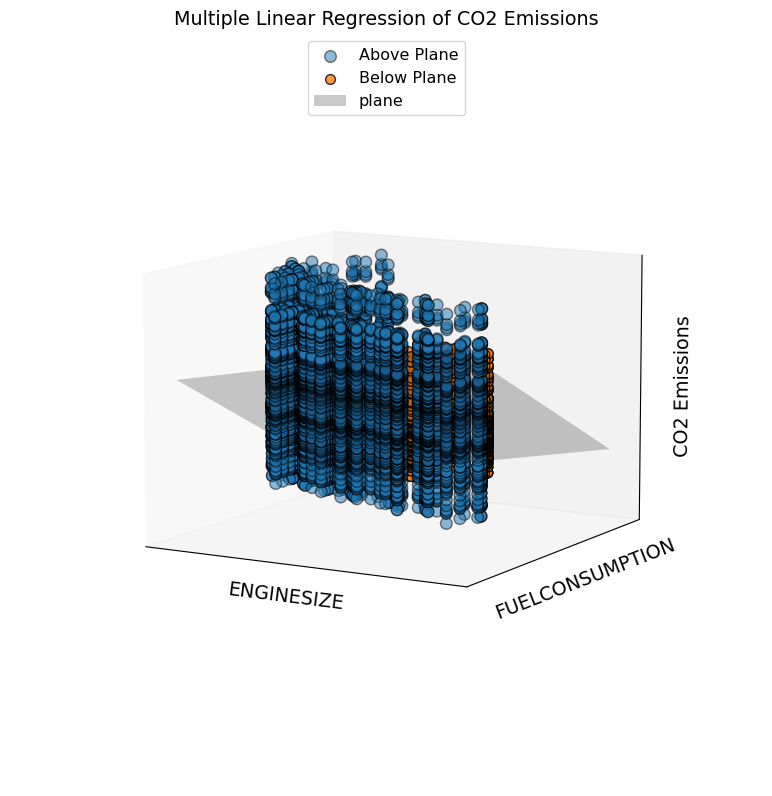

In [0]:
# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0, 0] * x1_surf  +  coef_[0, 1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection = '3d')

# Plot the data points above and below the plane in different colors
ax.scatter(
    X1[above_plane], 
    X2[above_plane], 
    y_test[above_plane],  
    label ='Above Plane', 
    s = 70, alpha= 0.5,
    ec = 'k'
)

ax.scatter(
    X1[below_plane], 
    X2[below_plane], 
    y_test[below_plane],  
    label = 'Below Plane', 
    s = 50, 
    alpha= 0.8,
    ec='k'
)

# Plot the regression plane
ax.plot_surface(
    x1_surf, 
    x2_surf, 
    y_surf, 
    color = 'k', 
    alpha = 0.21,
    label = 'plane'
)

# Set view and labels
ax.view_init(elev = 10)

ax.legend(fontsize = 'x-large', loc = 'upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom = 0.75)
ax.set_xlabel('ENGINESIZE', fontsize = 'xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize = 'xx-large')
ax.set_zlabel('CO2 Emissions', fontsize = 'xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize = 'xx-large')
plt.tight_layout()
plt.show()

### Model Evaluation

In [0]:
# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)

print(f'Mean Absolute error: {mean_absolute_error(y_test_, y_test):.2f}')
print(f'Mean Squared error: {mean_squared_error(y_test_, y_test):.2f}')
print(f'Root men squared error: {root_mean_squared_error(y_test_, y_test):.2f}')
print(f'R2-score: {r2_score(y_test_, y_test):.2f}')

Mean Absolute error: 13.94
Mean Squared error: 430.51
Root men squared error: 20.75
R2-score: 0.87


### Conclusion
---

Reliable Model

- High Explanatory Power (0.87): The model successfully captures 87% of emissions behavior. This is an excellent score for real-world data, indicating a very strong correlation between the chosen variables and pollution.

- Low Margin of Error (MAE 13.94): On average, the model is off by only ~14g of CO2. Considering that cars emit between 100g and 400g, an error of 14g represents very high accuracy for operational use.

- Stability (RMSE 20.75): The acceptable difference between the RMSE and MAE shows that the model is stable and is not making frequent gross errors, handling most data well, except for a few extreme cases (outliers).